# Tasks

Machine Learning and Statistics

Winter 2023/24

by Kenneth Linehan

## Task 1 

***

> Square roots are difficult to calculate. In Python, you typically use the power operator (a double asterisk) or a package such as `math`. In this task, 1 you should write a function `sqrt(x)` to approximate the square root of a floating point number x without using the power operator or a package.

> Rather, you should use the Newton’s method.  Start with an Square Roots via Newton’s Method. initial guess for the square root called $z_0$. You then repeatedly improve it using the following formula, until the difference between some previous guess $z_i$ and the next $z{i+1}$ is less than some threshold, say 0.01.

$$ z_{i+1} = z_i − \frac{z_i × z_i − x} {2z_i} $$


## Imports                                                                                                         
Imports libraries for notebook

In [101]:
# Data frames.
import pandas as pd

# Shuffles.
import random

# Statistics.
import scipy.stats as ss

In [102]:
def sqrt(x):
    # initial guess for square root
    z = x / 4.0

    # Loop until we are accurate enough
    for i in range(100):
        # Newton's Method for a better approximation
        z = z - (((z * z) - x) / (2 * z))

    # z should now be an approximation for the square root
    return z




In [103]:
## Test function on 3

sqrt(3)

1.7320508075688774

In [104]:
## Check Pythons value for square root of 3

3**0.5

1.7320508075688772

In [105]:
## The number that we want to calculate the square root of

x = 16

### Notes

***



***

## End

# Task 2

Consider the below contingency table based on a survey asking respondents whether they prefer coffee or tea and whether they prefer plain or chocolate biscuits. Use scipy.stats to perform a chi-squared test to see whether there is any evidence of an association between drink preference and biscuit preference in this instance.


<table>
  <tr>
    <th style="border: none;"></th>
    <th style="border: none;"></th>
    <th style="border-right;"><em>Biscuit</em></th>
    <th style="border: none;"></th>
  </tr>
  <tr>
    <th style="border: none;"></th>
    <th style="border: none;"></th>
    <td style="border-right;"><strong>Chocolate</strong></td>
    <td><strong>Plain</strong></td>
  </tr>
  <tr>
    <td><em>Drink</em></td>
    <td>Coffee</td>
    <td>43</td>
    <td>57</td>
  </tr>
  <tr>
    <th style="border: none;"></th>
    <td>Tea</td>
    <td>56</td>
    <td>45</td>
  </tr>
</table>







## Imports                                                                                                         
Imports libraries for Task 2

In [2]:
import numpy as np

# Data frames.
import pandas as pd

# Shuffles.
import random

# Statistics.
import scipy.stats as ss

## Creating the raw data

In this first part of working with the data, I am going to create all raw data from the choices made by the participants in the survey.

In [3]:
# Forty Three who preferred the drink Coffee and Chocolate
coffee_chocolate = [['Coffee', 'Chocolate']] * 43

# Show
print(coffee_chocolate)



[['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'],

In [4]:
# Fifty Seven who preferred the drink Coffee and plain biscuits
coffee_plain = [['Coffee', 'Plain']] * 57

# Show
print(coffee_plain)

[['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', '

In [5]:
# Fifty six who preferred the drink tea and chocolate biscuits
tea_chocolate = [['Tea', 'Chocolate']] * 56

# Show
print(tea_chocolate)

[['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', '

In [6]:
# Forty Three who preferred the drink tea and plain biscuits
tea_plain = [['Tea', 'Plain']] * 45

# Show
print(tea_plain)

[['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain']]


In [7]:
# Raw data, merge the four lists.
raw_data = coffee_chocolate + coffee_plain + tea_chocolate + tea_plain

# Shuffle and split the data randomly
shuffled_data = random.sample(raw_data, len(raw_data))

# Show the shuffled and split data.
print(shuffled_data)


[['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Tea', 'Chocolate'], ['Coffee', 'Chocolate'], ['Tea', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Plain'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Coffee', 'Chocolate'], ['Tea', 'Plain'], ['Tea', 'Chocolate'], ['Coffee', 'Plain'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Coffee', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Chocolate'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Tea', 'Chocolate'], ['Tea', 'Plain'], ['Coffee', 'Chocolate'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Plain'], ['Tea', 'Chocolate'], ['Tea', 'Chocolate'], ['Tea', 'Plain'], ['Tea', 'Chocolate'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Tea', 'Chocolate'], ['Coffee', 'Plain'], ['Coffee', 'Plain'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Coffee', 'Chocolate'], ['Tea', 'Plain'], ['Tea', 'Chocolate'], ['Coffee', 'Plain'], ['Tea', 'Plain'], ['Coffee', 'Chocolate'], ['Coffee', 'Plain'], ['Co

In [8]:
# Zip the list - make the rows columns and the columns rows.
# Interchanges the outer and inner lists.
drink, biscuit = list(zip(*raw_data))

# Show.
drink, biscuit

(('Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'C

In [9]:
# Create a data frame.
df = pd.DataFrame({'Drink': drink, 'Biscuit': biscuit})

# Show.
df

,Drink,Biscuit
0,Coffee,Chocolate
1,Coffee,Chocolate
2,Coffee,Chocolate
3,Coffee,Chocolate
4,Coffee,Chocolate
...,...,...
196,Tea,Plain
197,Tea,Plain
198,Tea,Plain
199,Tea,Plain


## Contingency Table

***

In [10]:
# Creating a contingency table with 'drink' and 'biscuit' columns
contingency_table = pd.crosstab(df['Drink'], df['Biscuit'])

# Show the contingency table
print(contingency_table)

Biscuit  Chocolate  Plain
Drink                    
Coffee          43     57
Tea             56     45


In [11]:
# Perform Crosstabs Contingency.
cross = ss.contingency.crosstab(df['Biscuit'], df['Drink'])

# Show.
cross

((array(['Chocolate', 'Plain'], dtype=object),
  array(['Coffee', 'Tea'], dtype=object)),
 array([[43, 56],
        [57, 45]]))

In [12]:
# Assuming cross is a tuple with two elements
first, second = cross  # Unpack the elements of the tuple

# Show
print(first, second)


(array(['Chocolate', 'Plain'], dtype=object), array(['Coffee', 'Tea'], dtype=object)) [[43 56]
 [57 45]]


In [15]:
# Create a DataFrame with the provided data
data = pd.DataFrame({'Biscuit': ['Chocolate', 'Plain'],
                     'Coffee': [43, 57],
                     'Tea': [56, 45]})

# Set 'Biscuit' column as the index
data.set_index('Biscuit', inplace=True)


In [17]:
# Perform the chi-squared test
chi2, p, _, _ = ss.chi2_contingency(data)

# Output the results
print("Chi-squared statistic:", chi2)
print("P-value:", p)

Chi-squared statistic: 2.6359100836554257
P-value: 0.10447218120907394


In [18]:
# Determine the significance level (alpha) for your test
alpha = 0.05

# Compare the p-value to alpha to make a decision
if p < alpha:
    print("There is evidence of an association between drink preference and biscuit preference.")
else:
    print("There is no evidence of an association between drink preference and biscuit preference.")

There is no evidence of an association between drink preference and biscuit preference.


## Notes
***

The chi-squared test results we got from the study were:

Chi-squared statistic: 2.6359
P-value: 0.1045

It was determined that there are no association between drink preference and biscuit preference.



# Task 3

Perform a t-test on the famous penguins data set to investigate whether there is evidence of a significant difference in the body mass of male and female gentoo penguins

In [4]:
# libraries

import seaborn as sns

import scipy.stats as stats

import pandas as pd

import urllib.request

In [5]:
csv = "https://github.com/mwaskom/seaborn-data/raw/master/penguins.csv"

# Download the dataset from the URL and read it into a DataFrame
with urllib.request.urlopen(csv) as response:
    penguins = pd.read_csv(response)

## General Info on Dataset

I am not very familiar with this dataset, so firstly I decided to use numpy to get a general review of this dataset.

In [6]:
print(penguins.head(10))


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   
6  Adelie  Torgersen            38.9           17.8              181.0   
7  Adelie  Torgersen            39.2           19.6              195.0   
8  Adelie  Torgersen            34.1           18.1              193.0   
9  Adelie  Torgersen            42.0           20.2              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  
5       3650.0    MALE  
6       36

In [7]:
print(penguins.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None


In [8]:
print(penguins.describe())


       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000


In [9]:
print(penguins['species'].value_counts())


Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64


In [10]:
print(penguins.isnull().sum())


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [11]:
print(penguins.corr())


                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.235053           0.656181   
bill_depth_mm           -0.235053       1.000000          -0.583851   
flipper_length_mm        0.656181      -0.583851           1.000000   
body_mass_g              0.595110      -0.471916           0.871202   

                   body_mass_g  
bill_length_mm        0.595110  
bill_depth_mm        -0.471916  
flipper_length_mm     0.871202  
body_mass_g           1.000000  


## T-Test on Dataset

Now that I have a bit more understanding on the dataset, I will prepare a t-test on the dataset. A t-test has been described as "type of statistical analysis used to compare the averages of two groups and determine whether the differences between them are more likely to arise from random chance." There are three forms of Student’s t-tests these are one-sample t-test, two-sample t-test; and two-sample paired t-test. The one-sample t-test examines a single dataset to determine whether a particular statistic within that dataset is equal to a specified value. For example, it can be used to assess whether the mean of the dataset is equal to zero. This wouldn't really work with the penguin dataset, as we need to investigate two independent groups to determine if there is a statistically significant difference between them.

Below is the latex for a one sample t-test:

One sample t-test:

$$ t = \frac{Z}{s} = \frac{\bar{X} - \mu}{\frac{\hat{\sigma}}{\sqrt{n}}} $$

We will use the independent samples t-test to investigate this dataset:

$$ t = \frac{m_A - m_B}{\sqrt{\frac{S^2}{n_A} + \frac{S^2}{n_B}}} $$

- A and B represent the two groups to compare.

- mAand mB represent the means of groups A and B, respectively.

- nA and nB represent the sizes of group A and B, respectively.


For the purposes of our dataset, we'll say A is male and B is female




In [12]:
# Seperates the sex of male penguins

male_penguins_df = penguins[penguins['sex'] == 'MALE']

In [13]:
print (male_penguins_df)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
7    Adelie  Torgersen            39.2           19.6              195.0   
13   Adelie  Torgersen            38.6           21.2              191.0   
14   Adelie  Torgersen            34.6           21.1              198.0   
..      ...        ...             ...            ...                ...   
333  Gentoo     Biscoe            51.5           16.3              230.0   
335  Gentoo     Biscoe            55.1           16.0              230.0   
337  Gentoo     Biscoe            48.8           16.2              222.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g   sex  
0         3750.0  MALE  
5         3650.0  MALE  
7         46

In [16]:
female_penguins_df = penguins[penguins['sex'] == 'FEMALE']

In [17]:
print (female_penguins_df)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
6    Adelie  Torgersen            38.9           17.8              181.0   
12   Adelie  Torgersen            41.1           17.6              182.0   
..      ...        ...             ...            ...                ...   
332  Gentoo     Biscoe            43.5           15.2              213.0   
334  Gentoo     Biscoe            46.2           14.1              217.0   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   

     body_mass_g     sex  
1         3800.0  FEMALE  
2         3250.0  FEMALE  
4     

In [20]:
# Spliting code so we only have body mass of male/female, with their species and island

# Filter the DataFrame to select only male penguins
male_penguins_df = penguins[penguins['sex'] == 'MALE']

# Print species, island, sex, and body mass for male penguins
for index, row in male_penguins_df.iterrows():
    print(f"Species: {row['species']}, Island: {row['island']}, Sex: {row['sex']}, Body Mass: {row['body_mass_g']} grams")


Species: Adelie, Island: Torgersen, Sex: MALE, Body Mass: 3750.0 grams
Species: Adelie, Island: Torgersen, Sex: MALE, Body Mass: 3650.0 grams
Species: Adelie, Island: Torgersen, Sex: MALE, Body Mass: 4675.0 grams
Species: Adelie, Island: Torgersen, Sex: MALE, Body Mass: 3800.0 grams
Species: Adelie, Island: Torgersen, Sex: MALE, Body Mass: 4400.0 grams
Species: Adelie, Island: Torgersen, Sex: MALE, Body Mass: 4500.0 grams
Species: Adelie, Island: Torgersen, Sex: MALE, Body Mass: 4200.0 grams
Species: Adelie, Island: Biscoe, Sex: MALE, Body Mass: 3600.0 grams
Species: Adelie, Island: Biscoe, Sex: MALE, Body Mass: 3950.0 grams
Species: Adelie, Island: Biscoe, Sex: MALE, Body Mass: 3800.0 grams
Species: Adelie, Island: Biscoe, Sex: MALE, Body Mass: 3550.0 grams
Species: Adelie, Island: Biscoe, Sex: MALE, Body Mass: 3950.0 grams
Species: Adelie, Island: Dream, Sex: MALE, Body Mass: 3900.0 grams
Species: Adelie, Island: Dream, Sex: MALE, Body Mass: 3900.0 grams
Species: Adelie, Island: Drea

In [21]:
# Filter the DataFrame to select only male penguins
male_penguins_df = penguins[penguins['sex'] == 'FEMALE']

# Print species, island, sex, and body mass for male penguins
for index, row in male_penguins_df.iterrows():
    print(f"Species: {row['species']}, Island: {row['island']}, Sex: {row['sex']}, Body Mass: {row['body_mass_g']} grams")

Species: Adelie, Island: Torgersen, Sex: FEMALE, Body Mass: 3800.0 grams
Species: Adelie, Island: Torgersen, Sex: FEMALE, Body Mass: 3250.0 grams
Species: Adelie, Island: Torgersen, Sex: FEMALE, Body Mass: 3450.0 grams
Species: Adelie, Island: Torgersen, Sex: FEMALE, Body Mass: 3625.0 grams
Species: Adelie, Island: Torgersen, Sex: FEMALE, Body Mass: 3200.0 grams
Species: Adelie, Island: Torgersen, Sex: FEMALE, Body Mass: 3700.0 grams
Species: Adelie, Island: Torgersen, Sex: FEMALE, Body Mass: 3450.0 grams
Species: Adelie, Island: Torgersen, Sex: FEMALE, Body Mass: 3325.0 grams
Species: Adelie, Island: Biscoe, Sex: FEMALE, Body Mass: 3400.0 grams
Species: Adelie, Island: Biscoe, Sex: FEMALE, Body Mass: 3800.0 grams
Species: Adelie, Island: Biscoe, Sex: FEMALE, Body Mass: 3800.0 grams
Species: Adelie, Island: Biscoe, Sex: FEMALE, Body Mass: 3200.0 grams
Species: Adelie, Island: Biscoe, Sex: FEMALE, Body Mass: 3150.0 grams
Species: Adelie, Island: Dream, Sex: FEMALE, Body Mass: 3250.0 gra

We now have two clean datasets with the data which we require in order to work with the dataset.

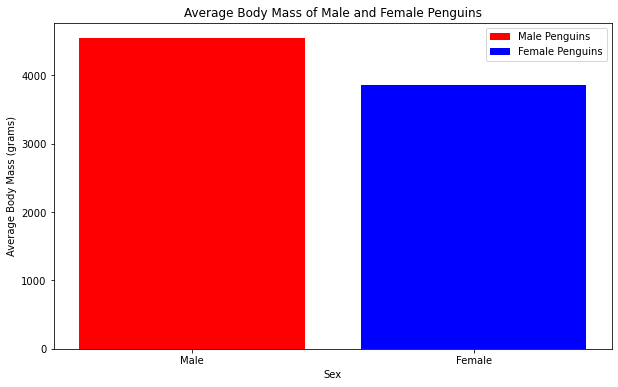

In [24]:
import matplotlib.pyplot as plt

# Separate male and female penguins
male_penguins = penguins[penguins['sex'] == 'MALE']
female_penguins = penguins[penguins['sex'] == 'FEMALE']

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar('Male', male_penguins['body_mass_g'].mean(), color='red', label='Male Penguins')
plt.bar('Female', female_penguins['body_mass_g'].mean(), color='blue', label='Female Penguins')

plt.xlabel('Sex')
plt.ylabel('Average Body Mass (grams)')
plt.title('Average Body Mass of Male and Female Penguins')
plt.legend()
plt.show()


## Task 4

Using the famous iris data set, suggest whether the setosa class is easily separable from the other two classes. Provide evidence for your answer.

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

In [27]:
# Load Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target_names[iris.target]

In [29]:
# Print dataset information
print("Feature Names:", iris.feature_names)
print("Target Names:", iris.target_names)
print("Number of Instances:", len(iris.data))

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']
Number of Instances: 150
Number of Features: 4
Number of Classes: 3


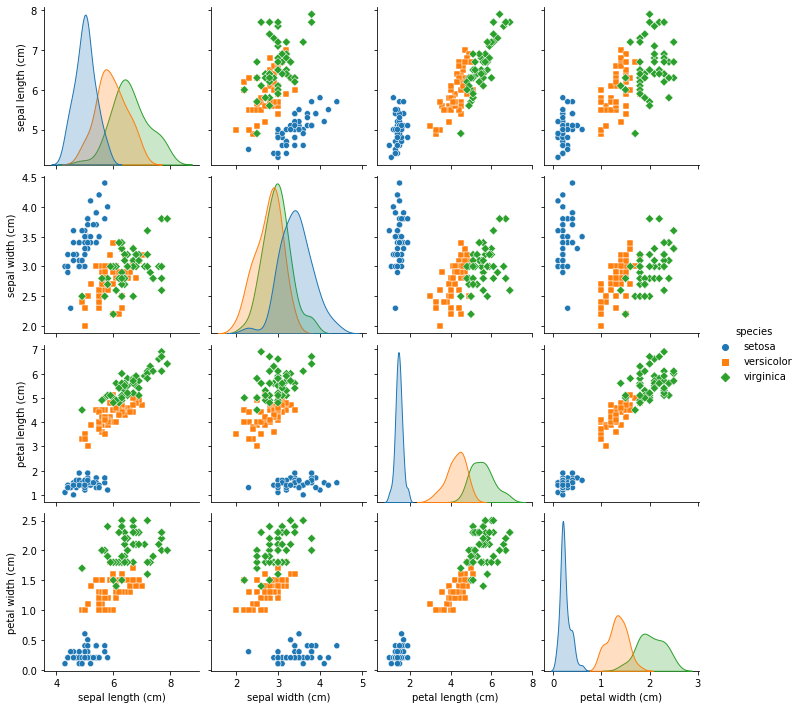

In [30]:
# Pair plot to visualize relationships between features
sns.pairplot(data, hue='species', markers=['o', 's', 'D'])
plt.show()